In [ ]:
#Upload file "Jobs_API.ipynb"

In [2]:
#Nhập thư viện
import pandas as pd
import requests
import json

#Get a data by API
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
response = requests.get(api_url)
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()

In [ ]:
#Determine the number of jobs currently open for various technologies and for various locations

In [3]:
#Cách 1:
#Xây dựng hàm
def get_number_of_jobs_L(location):
    number_of_jobs_L = 0
    for i in range(len(data)):
        locations = data[i].get('Location')
        # Kiểm tra nếu 'Location' trong dữ liệu khớp với location đầu vào
        if locations == location:
            number_of_jobs_L += 1
    return location, number_of_jobs_L

def get_number_of_jobs_T(techonogy):
    number_of_jobs_T = 0
    for i in range(len(data)):
        key_skills = data[i].get('Key Skills')
        # Kiểm tra nếu 'techonogy' là phần tử của  techonogys không?
        if techonogy in key_skills:
            number_of_jobs_T += 1
    return techonogy, number_of_jobs_T

In [7]:
#Check
get_number_of_jobs_L("Los Angeles")

('Los Angeles', 640)

In [8]:
#Check
get_number_of_jobs_T("Java")

('Java', 2609)

In [10]:
#Cách 2
#Đếm số lượng công việc theo location
# Tạo một tập hợp để lưu trữ các giá trị duy nhất
unique_locations = set()

# Duyệt qua dữ liệu và thêm vào tập hợp
for i in range(0, len(data)):
    location = data[i].get('Location')
    if location:  # Kiểm tra nếu location không phải là None
        unique_locations.add(location)

def get_number_of_jobs_L(unique_locations):
    job_counts = {location: 0 for location in unique_locations}
    
    # Count jobs for each location
    for job in data:
        job_location = job['Location']
        if job_location in job_counts:
            job_counts[job_location] += 1
    
    return job_counts

# Get the number of jobs
number_of_jobs = get_number_of_jobs_L(unique_locations)

#Chuyển đổi dictionary thành DataFrame
df = pd.DataFrame(list(number_of_jobs.items()), columns=['Location', 'Number_of_Jobs'])
df.head()

,Location,Number_of_Jobs
0,Houston,3339
1,Baltimore,1263
2,New York,3226
3,Austin,434
4,Dallas,1208


In [11]:
## Lưu DataFrame vào file csv
df.to_csv("number_of_jobs_location.csv", index=False)

In [12]:
# Duyệt các dữ liệu kỹ năng và thêm vào tập hợp
all_skills = set()
for job in data:
    key_skills = job.get('Key Skills').split('|')
    skills = {skill.strip() for skill in key_skills}
    all_skills.update(skills)

#Xây dựng hàm đếm số lượng công việc
def get_number_of_jobs_T(all_skills):
    job_counts_T = {tech: 0 for tech in all_skills}

    for job in data:
        job_skills = job.get('Key Skills', '')

        for tech in all_skills:
            if tech in job_skills:
                job_counts_T[tech] += 1

    return job_counts_T
# Get the number of jobs
number_of_jobs_T = get_number_of_jobs_T(all_skills)
#Chuyển đổi dictionary thành DataFrame
df_skill = pd.DataFrame(list(number_of_jobs_T.items()), columns=['Techonogy', 'Number_of_Jobs_T'])
df_skill.head()

,Techonogy,Number_of_Jobs_T
0,,27005
1,Gujarati,5
2,Studio,122
3,mobile,273
4,denial management,5


In [13]:
## Lưu DataFrame vào file csv
df.to_csv("number_of_jobs_techonogy.csv", index=False)

In [14]:
#Đọc dữ liệu từ json vào dataframe
df_job = pd.read_json(api_url)
df_job.head()

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
0,0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Los Angeles,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| client...,Retail Sales,New York,"Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,2,Trainee Research/ Research Executive- Hi- Tech...,0 - 1 yrs,Computer science| Fabrication| Quality check| ...,R&D,San Francisco,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases| ...,Programming & Design,Boston,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer


In [76]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27005 entries, 0 to 27004
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       27005 non-null  int64 
 1   Job Title                27005 non-null  object
 2   Job Experience Required  27005 non-null  object
 3   Key Skills               27005 non-null  object
 4   Role Category            27005 non-null  object
 5   Location                 27005 non-null  object
 6   Functional Area          27005 non-null  object
 7   Industry                 27005 non-null  object
 8   Role                     27005 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.9+ MB


In [77]:
df_job.describe(include = 'all')

,Id,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role
count,27005.000000,27005,27005,27005,27005,27005,27005,27005,27005
unique,NaN,21644,246,25279,204,13,69,122,629
top,NaN,Sales Executive,2 - 5 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,Programming & Design,Washington DC,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer
freq,NaN,119,1859,102,8365,5316,7230,9672,6250
mean,14973.294316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8661.945426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7474.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,14913.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,22477.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#Đếm số lượng job theo location và xếp theo thứ tự giảm dần
#Cách 1: job_location = df_job['Location'].value_counts().sort_values(ascending=False)
#Cách 2:
job_location = df_job.groupby("Location").size().sort_values(ascending=False).reset_index()
job_location.columns = ["Location","Count"]
job_location.head()

,Location,Count
0,Washington DC,5316
1,Detroit,3945
2,Seattle,3375
3,Houston,3339
4,New York,3226


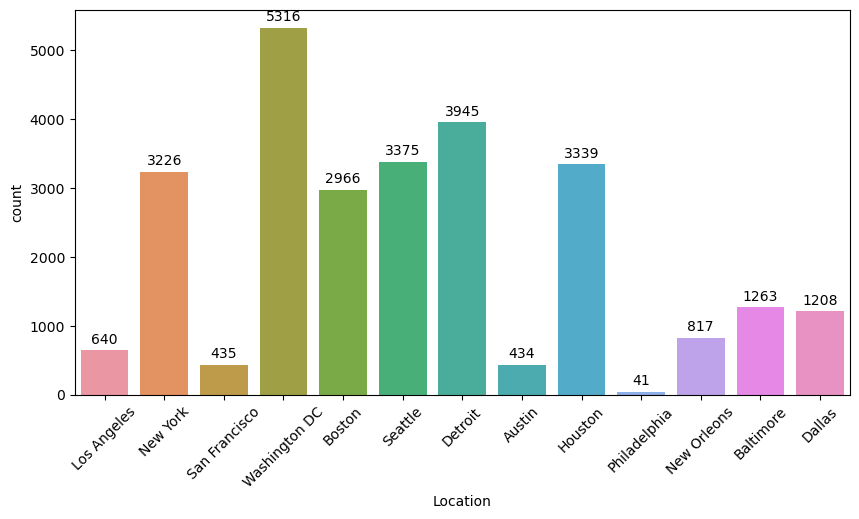

In [42]:
#Vẽ đồ thị
#Cách 1: 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,5))
ax = sns.countplot(x = "Location", data = df_job)
plt.xticks(rotation = 45)
# Hiển thị số trên mỗi thanh
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.show()

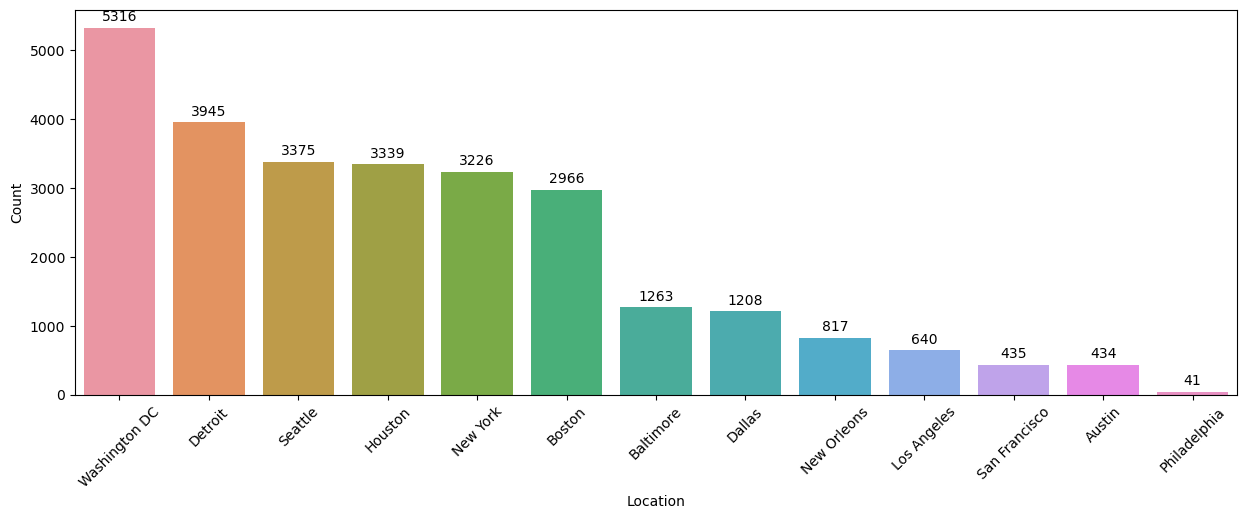

In [41]:
#Cách 2: Hiện thị theo thứ tự
plt.figure(figsize = (15,5))
ax = sns.barplot(x = "Location", y = "Count", data = job_location)
plt.xticks(rotation = 45)
# Hiển thị số trên mỗi thanh
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.show()

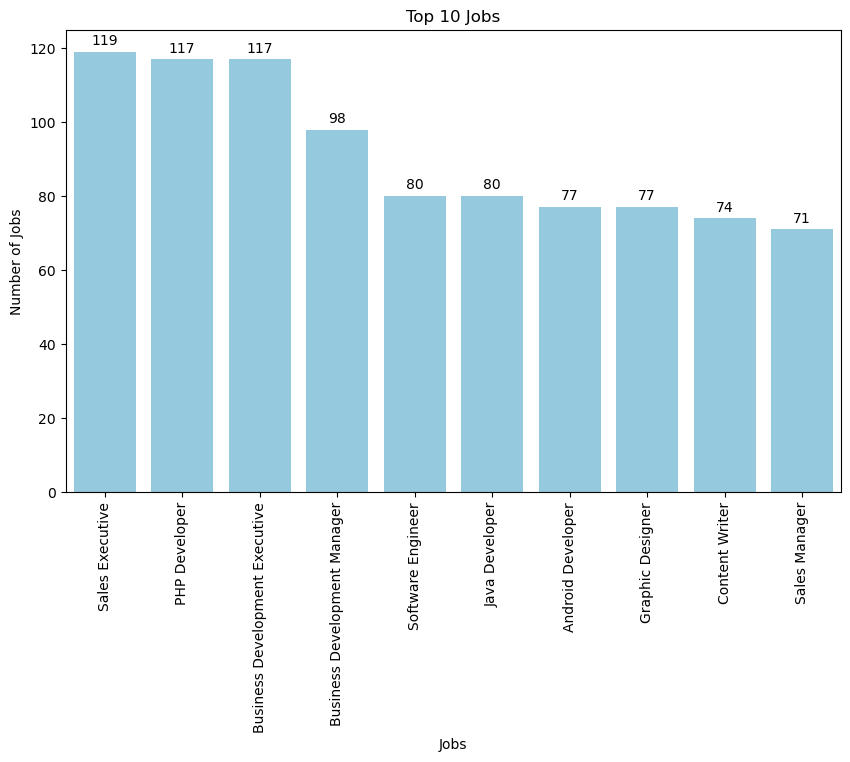

In [54]:
#Biểu đồ top10 công việc được tuyển dụng nhiều nhất
top10_job = df_job["Job Title"].value_counts().head(10).reset_index()
top10_job.columns = ["Jobs","Count"]

plt.figure(figsize = (10,6))
ax = sns.barplot(x="Jobs", y = "Count", data = top10_job, color = "Skyblue")
plt.xticks(rotation = 90)
plt.title("Top 10 Jobs")
plt.xlabel("Jobs")
plt.ylabel("Number of Jobs")
#Hiển thị số liệu trên thanh biểu đồ
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)
plt.show()

In [72]:
#Đếm số lượng công việc theo kỹ năng
df_skills = df_job[["Key Skills"]]
df_skills["Key Skills"] = df_skills["Key Skills"].str.split("|")
df_exploded = df_skills.explode("Key Skills")
df_exploded["Key Skills"] = df_exploded["Key Skills"].str.strip()
df_exploded = df_exploded["Key Skills"].value_counts().head(30).reset_index()
df_exploded.columns = ["Skill","Count"]
df_exploded.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Skill,Count
0,Javascript,1434
1,SQL,1292
2,HTML,1285
3,Sales,1221
4,Python,1165


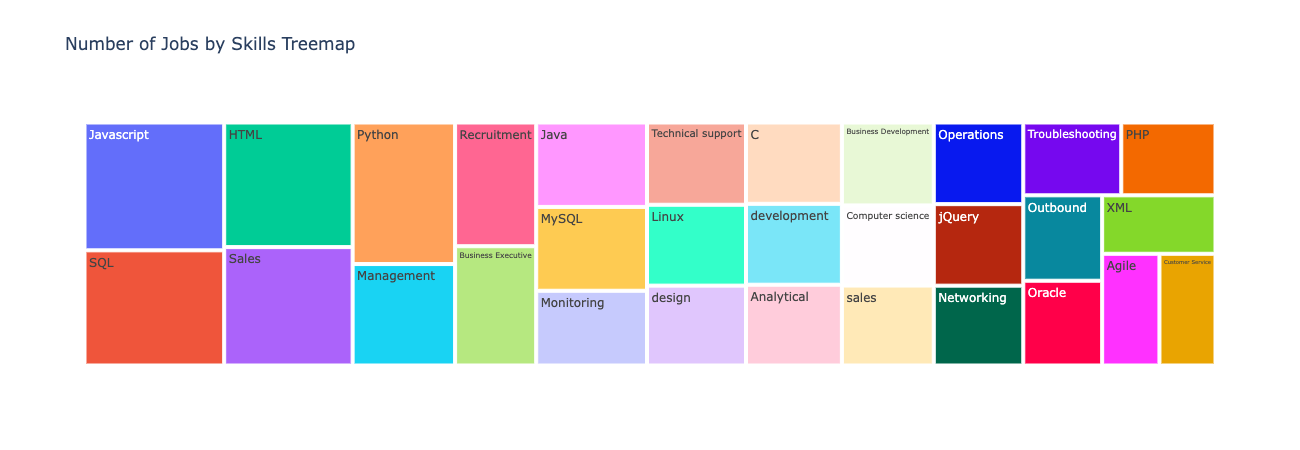

In [73]:
#Vẽ biểu đồ treemap
import plotly.express as px
fig = px.treemap(
    df_exploded,
    path=['Skill'],
    values='Count',
    title='Number of Jobs by Skills Treemap'
)
fig.show()